# Финальная работа 
## курс "Введнение в машинное обучение"
### Центральная предельная теорема своими руками

In [230]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

####  Я выбрала для работы распределение Вейбулла:
https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.weibull_min.html#scipy.stats.weibull_min
https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%92%D0%B5%D0%B9%D0%B1%D1%83%D0%BB%D0%BB%D0%B0

Формулы для среднего и дисперсии (из Википедии):

а) математическое ожидание
$$\mu=\lambda\Gamma\left(1+\frac{1}{k}\right),$$  

б) дисперсия
$$\sigma^2=\lambda^2\left(\Gamma\left(1+\frac{2}{k}\right)-\Gamma^2\left(1+\frac{1}{k}\right)\right),$$

где $\lambda=1$ (в Python это распределение задано с этим значением параметра, только параметр $k$ можно задавать произвольно при инициализации), $k$ - произвольный действительный положительный параметр, в методе sts.weibull_min это параметр $c$,

$\Gamma(a)$ - это гамма-функция (определение из википедии - https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F, в python реализована функция math.gamma(X) в модуле math - https://docs.python.org/2/library/math.html).



In [231]:
# у данного распределения есть два положительных параметра k и lambda=1  
c = 1.2
# зададим случайную величину
WeiBull = sts.weibull_min(c)
# =========================================================================================================================
# проверим формулы из Википедии для среднего и дисперсии
mu_teor = mt.gamma(1+1/c)
sigma_teor = (mt.gamma(1+2/c)-mt.gamma(1+1/c)**2)
print 'Матожидание по формуле =', mu_teor, ' Дисперсия по формуле =', sigma_teor
# эти значения возвращенные стандартной функцией
print 'Матожидание стандартным методом =', sts.weibull_min.mean(c),' Дисперсия стандартным методом =', sts.weibull_min.var(c)
# =========================================================================================================================

Матожидание по формуле = 0.940655858257  Дисперсия по формуле = 0.619742044579
Матожидание стандартным методом = 0.940655858257  Дисперсия стандартным методом = 0.619742044579


 В Python это распределение задается с помощью одного параметра, параметра $k$, или параметра $с$. В зависимости от величины этого параметра, вид функции плотности распределения будет меняться. И если этот коэффициент близок к 1, то функция плотности распределения будет похожа на нормальное, как остроконечная шляпа, поэтому для получения более экзотичного вида лучше выбирать его значение подальше от 1. Еще одно различие от стандартного Вейбула, это то, что питоновский определен для всех значений $x$, это значит, что график функции плотности распределения будет симметричен относительно ертикальной оси, это можно видеть и в описании распределения.

#### Построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения вашей случайной величины:

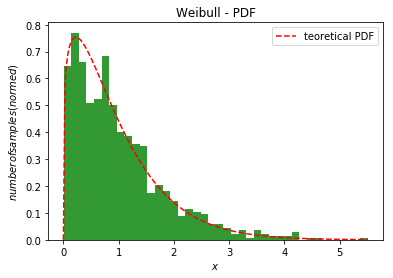

In [232]:
# сгенерируем выборку объема 1000 
sample = WeiBull.rvs(size=1000, random_state = None)

# найдем границу для графика плотности
l = sample.max() 

# сгенерируем иксы для графика теоретической плотности
x = np.linspace(0, l, 200)

# построим гистограмму
plt.hist(sample, bins = 40 ,normed = True, facecolor = 'green', alpha = 0.8)

# график теоретической плотности распределения
plt.plot(x, WeiBull.pdf(x), 'r--' ,label = "teoretical PDF")
plt.legend()
plt.title('Weibull - PDF')
plt.ylabel('$number of samples (normed) $')
plt.xlabel('$x$')

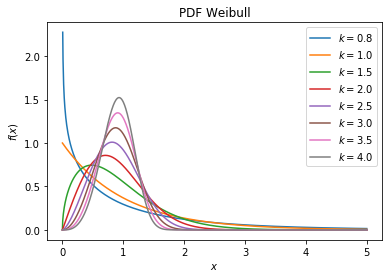

In [220]:
# в этом блоке решила показать несколько графиков плотностей в зависимости от величины коэффициента k
x = np.linspace(0, 5, 1000)
for k in [0.8, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]:
    WBull = sts.weibull_min(k)
    pdf = WBull.pdf(x)
    plt.plot(x, pdf, label = "$k=%s$" % k)
    
plt.legend()
plt.title('PDF Weibull')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

#### Демонстрация Центральной предельной теоремы
Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях $n$ (например, $5$, $10$, $50$) сгенерируйте $1000$ выборок объёма $n$ и постройте гистограммы распределений их выборочных средних.

In [233]:
# определим выборочное среднее самостоятельно
def mu_(X):
    tmp = 0                    # обнулить сумму на входе
    for i in range(len(X)):    # считаем сумму по всем элементам переданного массива
        tmp+=X[i]
    return tmp/len(X)          # возвращаем сумму, деленную на количество элементов

# определим выборочную дисперсию 
def sigma_(X):
    tmp = 0
    mn = mu_(X)
    for i in range(len(X)):
        tmp+=(X[i]-mn)**2
    return tmp/(len(X)-1)

Используя информацию о среднем и дисперсии исходного распределения, посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

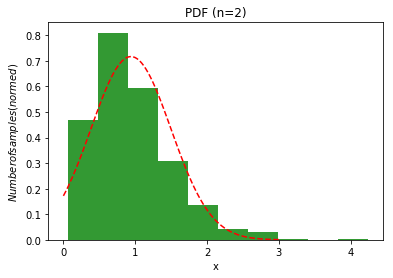

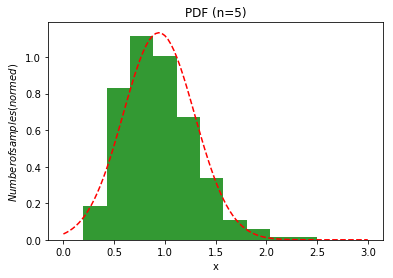

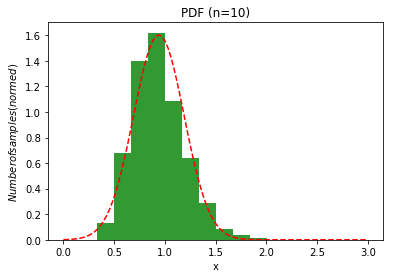

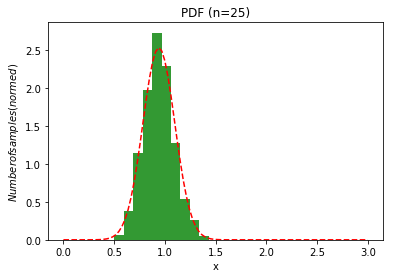

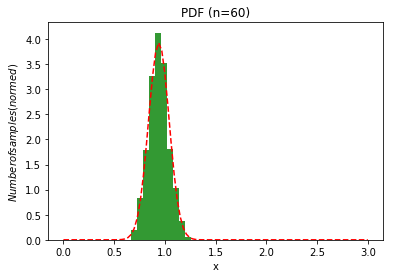

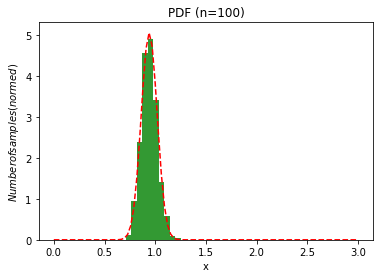

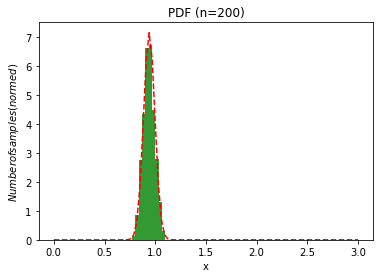

In [234]:
# сгенерируем 1000 выборок размера n = 2, 5, 10, 25, 60
size = 1000
for n in [2, 5, 10, 25, 60, 100, 200]:
    # сформируем ряд средних значений по каждому набору
    mu = []
    for i in range(size):
        mu.append(mu_(WeiBull.rvs(size = n, random_state = None)))
    # построим гистограмму распределения средних значений    
    plt.hist(mu, bins=10, normed = True, facecolor = 'green', alpha = 0.8)
    # зададим нормальное распределение для центральной предельной теоремы используя теоретические значения матожидания и дисперсии
    norm_teor = sts.norm(loc = mu_teor, scale = (sigma_teor/n)**(0.5))
    x = np.linspace(0, 3, 100)
    pdf_teor = norm_teor.pdf(x)
    plt.plot(x,pdf_teor, 'r--')
    plt.title("PDF (n=%s)" %n)
    plt.xlabel("x")
    plt.ylabel("$ Number of samples (normed) $")
    plt.show()

Итоги работы: Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n? 

- Можно наблюдать, что дисперсия уменьшается, это значит, что точность аппроксимации среднего значения возрастает.Так же можно видеть, что распределение становится более похожим на нормальное. Все гистограммы были построены в одном масштабе по горизонтальной координате. Надо сказать, что распределение несиметричное, бывают и выбросы, капризное.  

- Спасибо за интересный курс!